# Group By: split-apply-combine
### https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

By "group by" we are referring to a process involving one or more of the following steps:

  - **Splitting** the data into groups based on some criteria. (로우들을 그룹으로 나눈다)
  - **Applying** a function to each group independently. (그룹별로 무언가 액션을 취한다)
  - **Combining** the results into a data structure. (그룹별 결과를 모은다)

In the **apply** step, we might wish to do one of the following: (그룹별로 무슨 액션을 취하는가?)

  - **Aggregation**: compute a summary statistic (or statistics) for each group. (그룹별로 스칼라 값을 추출)
    - Compute group sums or means.
    - Compute group sizes / counts.

  - **Transformation**: perform some group-specific computations and return a like-indexed object. (그룹별로 새로운 데이터프레임을 만듬)
    - Standardize data (zscore) within a group.
    - Filling NAs within groups with a value derived from each group.

  - **Filtration**: discard some groups, according to a group-wise computation that evaluates True or False. (그룹들 중 어떤 그룹을 살릴지 결정)

    - Discard data that belongs to groups with only a few members.
    - Filter out data based on the group sum or mean.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Splitting an object into groups

- On a DataFrame, we obtain a `GroupBy` object by calling `groupby()`. We could naturally group by either the A or B columns, or both:

> [**References**]
> - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
> - https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html#indexing-iteration
> - https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html

```
grouped = tips.groupby('smoker')
grouped

grouped.groups
grouped.groups.keys()

grouped = tips.groupby(['smoker', 'time'])
grouped.groups

len(grouped)
grouped.sum()
grouped.describe()

df = grouped.sum()
df.index
```

In [2]:
grouped = tips.groupby('smoker')
grouped

In [3]:
grouped.groups

{'Yes': Int64Index([ 56,  58,  60,  61,  62,  63,  67,  69,  72,  73,  76,  80,  83,
              90,  92,  93,  95,  96,  97,  98, 100, 101, 102, 103, 105, 106,
             107, 109, 138, 164, 168, 169, 170, 171, 172, 173, 174, 175, 176,
             177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190,
             191, 192, 193, 194, 196, 197, 198, 199, 200, 201, 202, 203, 204,
             205, 206, 207, 208, 209, 210, 211, 213, 214, 215, 216, 217, 218,
             219, 220, 221, 222, 224, 225, 226, 229, 230, 231, 234, 236, 237,
             240, 241],
            dtype='int64'),
 'No': Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             223, 227, 228, 232, 233, 235, 238, 239, 242, 243],
            dtype='int64', length=151)}

In [4]:
grouped.groups.keys()

dict_keys(['Yes', 'No'])

In [5]:
grouped = tips.groupby(['smoker', 'time'])
grouped.groups

{('No',
  'Dinner'): Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             212, 227, 228, 232, 233, 235, 238, 239, 242, 243],
            dtype='int64', length=106),
 ('No',
  'Lunch'): Int64Index([ 77,  78,  79,  81,  82,  84,  85,  86,  87,  88,  89, 117, 118,
             119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
             132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145,
             146, 147, 148, 149, 195, 223],
            dtype='int64'),
 ('Yes',
  'Dinner'): Int64Index([ 56,  58,  60,  61,  62,  63,  67,  69,  72,  73,  76,  90,  92,
              93,  95,  96,  97,  98, 100, 101, 102, 103, 105, 106, 107, 109,
             164, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
             180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 206, 207, 208,
             209, 210, 211, 213, 214, 215, 216, 217, 218, 219, 229, 230, 231,
             234, 236, 237, 240, 241],
            dtype='in

In [6]:
len(grouped)

4

In [7]:
grouped.sum()

total_bill     tip  size
smoker time                            
Yes    Lunch       400.18   65.19    51
       Dinner     1530.16  214.62   173
No     Lunch       767.29  120.32   113
       Dinner     2130.14  331.45   290

In [8]:
grouped.describe()

total_bill                                               \
                   count       mean        std   min      25%     50%   
smoker time                                                             
Yes    Lunch        23.0  17.399130   7.871368  8.58  13.0000  16.000   
       Dinner       70.0  21.859429  10.205330  3.07  14.3525  20.695   
No     Lunch        45.0  17.050889   7.719272  7.51  11.6900  15.950   
       Dinner      106.0  20.095660   8.342950  7.25  14.7425  18.265   

                                 tip            ...                 size  \
                   75%    max  count      mean  ...     75%   max  count   
smoker time                                     ...                        
Yes    Lunch   19.0750  43.11   23.0  2.834348  ...  3.7400   5.0   23.0   
       Dinner  27.9325  50.81   70.0  3.066000  ...  3.6475  10.0   70.0   
No     Lunch   20.2700  41.19   45.0  2.673778  ...  3.0000   6.7   45.0   
       Dinner  23.8825  48.33  106.0  3.126887  ...  3.6850   9.0  106.0   

                                                            
                   mean       std  min  25%  50%  75%  max  
smoker time                                                 
Yes    Lunch   2.217391  0.671262  1.0  2.0  2.0  2.0  4.0  
       Dinner  2.471429  0.846501  1.0  2.0  2.0  3.0  5.0  
No     Lunch   2.511111  1.179796  1.0  2.0  2.0  2.0  6.0  
       Dinner  2.735849  0.939117  1.0  2.0  2.0  3.0  6.0  

[4 rows x 24 columns]

In [9]:
df = grouped.sum()
df.index

MultiIndex([('Yes',  'Lunch'),
            ('Yes', 'Dinner'),
            ( 'No',  'Lunch'),
            ( 'No', 'Dinner')],
           names=['smoker', 'time'])

### Selecting a group

- A single group can be selected using `get_group()`:

> [**Reference**] https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html#indexing-iteration

```
keys = list(grouped.groups.keys())
keys

index = grouped.groups[keys[0]]
tips.loc[index]

grouped.get_group(keys[0])
```

In [10]:
keys = list(grouped.groups.keys())
keys

[('No', 'Dinner'), ('No', 'Lunch'), ('Yes', 'Dinner'), ('Yes', 'Lunch')]

In [11]:
index = grouped.groups[keys[0]]
tips.loc[index]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [12]:
grouped.get_group(keys[0])

,total_bill,tip,sex,day,size
0,16.99,1.01,Female,Sun,2
1,10.34,1.66,Male,Sun,3
2,21.01,3.50,Male,Sun,3
3,23.68,3.31,Male,Sun,2
4,24.59,3.61,Female,Sun,4
5,25.29,4.71,Male,Sun,4
6,8.77,2.00,Male,Sun,2
7,26.88,3.12,Male,Sun,4
8,15.04,1.96,Male,Sun,2
9,14.78,3.23,Male,Sun,2


### Iterating through groups

- With the `GroupBy` object in hand, iterating through the grouped data is very natural and functions similarly to `itertools.groupby()`:

> [**Reference**] https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html#indexing-iteration

```
for key, group in grouped:
    print(key, '\n', group.head(), end='\n'*2)
```

In [13]:
for key, group in grouped:
    print(key, '\n', group.head(), end='\n'*2)

('Yes', 'Lunch') 
      total_bill   tip     sex smoker   day   time  size
80        19.44  3.00    Male    Yes  Thur  Lunch     2
83        32.68  5.00    Male    Yes  Thur  Lunch     2
138       16.00  2.00    Male    Yes  Thur  Lunch     2
191       19.81  4.19  Female    Yes  Thur  Lunch     2
192       28.44  2.56    Male    Yes  Thur  Lunch     2

('Yes', 'Dinner') 
     total_bill   tip   sex smoker  day    time  size
56       38.01  3.00  Male    Yes  Sat  Dinner     4
58       11.24  1.76  Male    Yes  Sat  Dinner     2
60       20.29  3.21  Male    Yes  Sat  Dinner     2
61       13.81  2.00  Male    Yes  Sat  Dinner     2
62       11.02  1.98  Male    Yes  Sat  Dinner     2

('No', 'Lunch') 
     total_bill   tip     sex smoker   day   time  size
77       27.20  4.00    Male     No  Thur  Lunch     4
78       22.76  3.00    Male     No  Thur  Lunch     2
79       17.29  2.71    Male     No  Thur  Lunch     2
81       16.66  3.40    Male     No  Thur  Lunch     2
82       10.

### Aggregation

- Once the `GroupBy` object has been created, several methods are available to perform a computation on the grouped data. An obvious one is aggregation via the `aggregate()` or equivalently `agg()` method:

```
grouped2 = grouped[['total_bill', 'tip']]
grouped2.get_group(('Yes', 'Lunch')).sum()

grouped2.aggregate(np.sum)

grouped2.sum()
grouped2.agg([np.sum, np.mean, np.std])
```

In [14]:
grouped2 = grouped[['total_bill', 'tip']]
grouped2.get_group(('Yes', 'Lunch')).sum()

total_bill    400.18
tip            65.19
dtype: float64

In [15]:
grouped2.aggregate(np.sum)

total_bill     tip
smoker time                      
Yes    Lunch       400.18   65.19
       Dinner     1530.16  214.62
No     Lunch       767.29  120.32
       Dinner     2130.14  331.45

In [16]:
grouped2.sum()

total_bill     tip
smoker time                      
Yes    Lunch       400.18   65.19
       Dinner     1530.16  214.62
No     Lunch       767.29  120.32
       Dinner     2130.14  331.45

In [17]:
grouped2.agg([np.sum, np.mean, np.std])

total_bill                           tip                    
                     sum       mean        std     sum      mean       std
smoker time                                                               
Yes    Lunch      400.18  17.399130   7.871368   65.19  2.834348  1.055832
       Dinner    1530.16  21.859429  10.205330  214.62  3.066000  1.499971
No     Lunch      767.29  17.050889   7.719272  120.32  2.673778  1.282964
       Dinner    2130.14  20.095660   8.342950  331.45  3.126887  1.399280

### Transformation

- The transform method returns an object that is indexed the same (same size) as the one being grouped.

> [**Reference**] https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#transformation

1. 먼저 1999년 10월 1일부터 2002년 10월 4일까지 1100일간의 시계열데이터를 만든다.
2. 데이터 값은 가우시안 분포(평균 0.5, 표준편차 2)에서 랜덤하게 추출한다.
3. 이 시계열데이터의 100일 이동평균을 구한다.

```
index = pd.date_range('10/1/1999', periods=1100)
index

ts = pd.Series(np.random.normal(0.5, 2, 1100), index)
ts.head()

ts = ts.rolling(window=100).mean().dropna() # moving window (이동평균)
ts.head()
```

In [18]:
index = pd.date_range('10/1/1999', periods=1100)
index

DatetimeIndex(['1999-10-01', '1999-10-02', '1999-10-03', '1999-10-04',
               '1999-10-05', '1999-10-06', '1999-10-07', '1999-10-08',
               '1999-10-09', '1999-10-10',
               ...
               '2002-09-25', '2002-09-26', '2002-09-27', '2002-09-28',
               '2002-09-29', '2002-09-30', '2002-10-01', '2002-10-02',
               '2002-10-03', '2002-10-04'],
              dtype='datetime64[ns]', length=1100, freq='D')

In [19]:
ts = pd.Series(np.random.normal(0.5, 2, 1100), index)
ts.head()

1999-10-01   -0.089067
1999-10-02   -0.586985
1999-10-03   -1.135232
1999-10-04    1.245707
1999-10-05    1.780528
Freq: D, dtype: float64

In [20]:
ts = ts.rolling(window=100).mean().dropna() # moving window (이동평균)
ts.head()

2000-01-08    0.513918
2000-01-09    0.514615
2000-01-10    0.524660
2000-01-11    0.493045
2000-01-12    0.474739
Freq: D, dtype: float64

- 각 년도별로 데이터 노멀라이즈는 어떻게? (평균 0, 표준편차 1)
> `(s - s.mean()) / s.std()`

```
grouped = ts.groupby(lambda x: x.year)
grouped.groups

s = grouped.get_group(2000)
(s - s.mean()) / s.std()

transformed = grouped.transform(lambda s: (s - s.mean()) / s.std())
transformed

s = transformed.groupby(lambda x: x.year).get_group(2000)
s.mean(), s.std()

compare = pd.DataFrame({'Original': ts, 'Transformed': transformed})
compare.T

compare.plot(figsize=(15,4))
```

In [21]:
grouped = ts.groupby(lambda x: x.year)
grouped.groups

{2000: DatetimeIndex(['2000-01-08', '2000-01-09', '2000-01-10', '2000-01-11',
                '2000-01-12', '2000-01-13', '2000-01-14', '2000-01-15',
                '2000-01-16', '2000-01-17',
                ...
                '2000-12-22', '2000-12-23', '2000-12-24', '2000-12-25',
                '2000-12-26', '2000-12-27', '2000-12-28', '2000-12-29',
                '2000-12-30', '2000-12-31'],
               dtype='datetime64[ns]', length=359, freq='D'),
 2001: DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
                '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
                '2001-01-09', '2001-01-10',
                ...
                '2001-12-22', '2001-12-23', '2001-12-24', '2001-12-25',
                '2001-12-26', '2001-12-27', '2001-12-28', '2001-12-29',
                '2001-12-30', '2001-12-31'],
               dtype='datetime64[ns]', length=365, freq='D'),
 2002: DatetimeIndex(['2002-01-01', '2002-01-02', '2002-01-03', '2002-

In [22]:
s = grouped.get_group(2000)
(s - s.mean()) / s.std()

2000-01-08    0.277885
2000-01-09    0.280928
2000-01-10    0.324824
2000-01-11    0.186669
2000-01-12    0.106670
                ...   
2000-12-27    1.743821
2000-12-28    1.610959
2000-12-29    1.549103
2000-12-30    1.291155
2000-12-31    1.544481
Freq: D, Length: 359, dtype: float64

In [23]:
transformed = grouped.transform(lambda s: (s - s.mean()) / s.std())
transformed

2000-01-08    0.277885
2000-01-09    0.280928
2000-01-10    0.324824
2000-01-11    0.186669
2000-01-12    0.106670
                ...   
2002-09-30    1.584342
2002-10-01    1.766700
2002-10-02    1.626957
2002-10-03    1.314268
2002-10-04    1.470800
Freq: D, Length: 1001, dtype: float64

In [24]:
s = transformed.groupby(lambda x: x.year).get_group(2000)
s.mean(), s.std()

(3.562609817181561e-16, 1.0)

In [25]:
compare = pd.DataFrame({'Original': ts, 'Transformed': transformed})
compare.T

,2000-01-08,2000-01-09,2000-01-10,2000-01-11,2000-01-12,2000-01-13,2000-01-14,2000-01-15,2000-01-16,2000-01-17,...,2002-09-25,2002-09-26,2002-09-27,2002-09-28,2002-09-29,2002-09-30,2002-10-01,2002-10-02,2002-10-03,2002-10-04
Original,0.513918,0.514615,0.524660,0.493045,0.474739,0.462360,0.474489,0.457622,0.44219,0.439559,...,0.453924,0.432888,0.471951,0.443108,0.432578,0.492879,0.515857,0.498249,0.458849,0.478573
Transformed,0.277885,0.280928,0.324824,0.186669,0.106670,0.052577,0.105576,0.031868,-0.03557,-0.047066,...,1.275182,1.108239,1.418252,1.189342,1.105776,1.584342,1.766700,1.626957,1.314268,1.470800


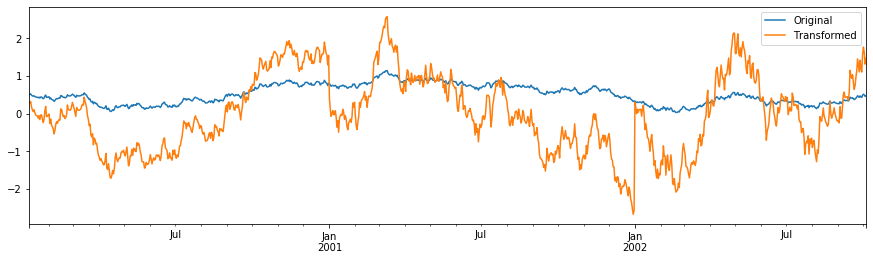

In [26]:
compare.plot(figsize=(15,4))

### Filteration

- The filter method returns a subset of the original object.

```
grouped2.sum()

df = grouped2.filter(lambda df: df.tip.sum() > 100 and df.tip.sum() < 300)
df.T

df = grouped2.get_group(('Yes', 'Dinner'))
df.T

df = grouped2.get_group(('No', 'Lunch'))
df.T
```

In [27]:
grouped2.sum()

total_bill     tip
smoker time                      
Yes    Lunch       400.18   65.19
       Dinner     1530.16  214.62
No     Lunch       767.29  120.32
       Dinner     2130.14  331.45

In [28]:
df = grouped2.filter(lambda df: df.tip.sum() > 100 and df.tip.sum() < 300)
df.T

,56,58,60,61,62,63,67,69,72,73,...,219,223,229,230,231,234,236,237,240,241
total_bill,38.01,11.24,20.29,13.81,11.02,18.29,3.07,15.01,26.86,25.28,...,30.14,15.98,22.12,24.01,15.69,15.53,12.6,32.83,27.18,22.67
tip,3.00,1.76,3.21,2.00,1.98,3.76,1.00,2.09,3.14,5.00,...,3.09,3.00,2.88,2.00,3.00,3.00,1.0,1.17,2.00,2.00


In [29]:
df = grouped2.get_group(('Yes', 'Dinner'))
df.T

,56,58,60,61,62,63,67,69,72,73,...,218,219,229,230,231,234,236,237,240,241
total_bill,38.01,11.24,20.29,13.81,11.02,18.29,3.07,15.01,26.86,25.28,...,7.74,30.14,22.12,24.01,15.69,15.53,12.6,32.83,27.18,22.67
tip,3.00,1.76,3.21,2.00,1.98,3.76,1.00,2.09,3.14,5.00,...,1.44,3.09,2.88,2.00,3.00,3.00,1.0,1.17,2.00,2.00


In [30]:
df = grouped2.get_group(('No', 'Lunch'))
df.T

,77,78,79,81,82,84,85,86,87,88,...,142,143,144,145,146,147,148,149,195,223
total_bill,27.2,22.76,17.29,16.66,10.07,15.98,34.83,13.03,18.28,24.71,...,41.19,27.05,16.43,8.35,18.64,11.87,9.78,7.51,7.56,15.98
tip,4.0,3.00,2.71,3.40,1.83,2.03,5.17,2.00,4.00,5.85,...,5.00,5.00,2.30,1.50,1.36,1.63,1.73,2.00,1.44,3.00
